# Stratified K Fold cross-validation

Using KNN dataset to implement stratified K Fold cross-validation 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# from os.path  import join
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedShuffleSplit

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
y = data['Type'].to_numpy()
X = data.drop(['Type'], axis=1).to_numpy()

lol = list(data.columns.values)
print(lol)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42, stratify=y)

In [7]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# skf = StratifiedKFold(n_splits=3)
# skf.get_n_splits(X, y)
# k_choices = sorted([1, 3, 5, 8, 10, 12, 15, 20, 50])

# k_accuracy = {}
# count = 0

# for k in k_choices:
#     knn = KNeighborsClassifier(n_neighbors=k)
    
#     accuracy = []
#     for train_index, val_index in skf.split(X_train, y_train):
# #         print("TRAIN:", train_index, "TEST:", test_index)
#         X_tr, X_val = X[train_index], X[val_index]
#         y_tr, y_val = y[train_index], y[val_index]
        
#         knn.fit(X_tr, y_tr)
#         y_pred = knn.predict(X_val)
        
#         accuracy.append(metrics.accuracy_score(y_val, y_pred))
#     k_accuracy[k] = accuracy
    
# print(k_accuracy)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

sss = StratifiedShuffleSplit(n_splits=5, random_state=0)
sss.get_n_splits(X, y)
k_choices = sorted([1, 3, 5, 8, 10, 12, 15, 20, 50])

k_accuracy = {}
count = 0

for k in k_choices:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    accuracy = []
    for train_index, val_index in sss.split(X_train, y_train):
#        print("TRAIN:", train_index, "TEST:", val_index)
        X_tr, X_val = X[train_index], X[val_index]
        y_tr, y_val = y[train_index], y[val_index]
        
        knn.fit(X_tr, y_tr)
        y_pred = knn.predict(X_val)
        
        accuracy.append(metrics.accuracy_score(y_val, y_pred))
    k_accuracy[k] = accuracy
    
print(k_accuracy)

{1: [0.8, 0.8666666666666667, 0.8, 0.8, 0.8666666666666667], 3: [0.6666666666666666, 0.9333333333333333, 0.8, 0.8, 0.8666666666666667], 5: [0.6666666666666666, 0.8, 0.8, 0.8, 0.8666666666666667], 8: [0.6666666666666666, 0.8, 0.8, 0.8666666666666667, 0.8666666666666667], 10: [0.6666666666666666, 0.8, 0.8, 0.8666666666666667, 0.8666666666666667], 12: [0.6666666666666666, 0.8, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333], 15: [0.7333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333], 20: [0.7333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667], 50: [0.6666666666666666, 0.8, 0.7333333333333333, 0.6, 0.8666666666666667]}


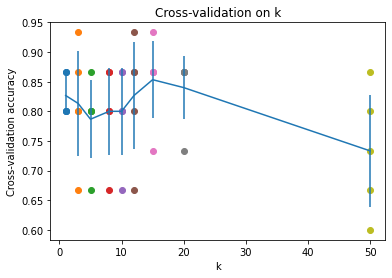

In [9]:
# plot the raw observations
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_accuracy.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_accuracy.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

# Best K

In [10]:
# Based on the cross-validation results above, choose the best value for k
best_k = k_choices[np.argmax(accuracies_mean)]
print("Best k is:",best_k)
print("Cross validation accuracy:",np.max(accuracies_mean))

Best k is: 15
Cross validation accuracy: 0.8533333333333333


## Report the final results on test data

In [11]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.676056338028169


ValueError: The palette list has the wrong number of colors.

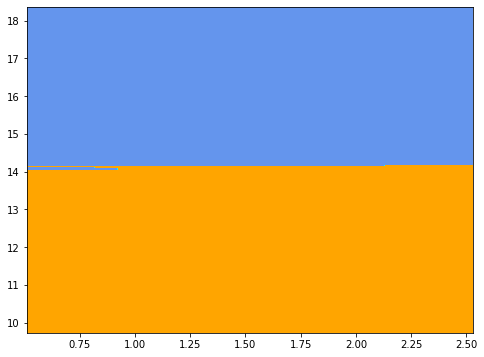

In [17]:
from matplotlib.colors import ListedColormap
import seaborn as sns

n_neighbors = 15

y = data['Type'].to_numpy()
X = data.drop(['Type'], axis=1).to_numpy()[:, :2]

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()